In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from collections import Counter
from IPython.display import HTML

In [2]:
data = pd.read_csv('../dogs_data/labels.csv')
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
breed = data.breed
breed.head()

0         boston_bull
1               dingo
2            pekinese
3            bluetick
4    golden_retriever
Name: breed, dtype: object

In [4]:
counter = Counter(breed)
counter_pairs = sorted(list(map(lambda k: (counter[k], k), counter)))

In [5]:
from functools import reduce
def f(a, b):
    if type(a) is tuple:
        return a[1] + ', ' + b[1]
    return a + ', ' + b[1]
format = lambda l: reduce(f, l)

print(f'Há {len(counter)} raças diferentes de cachorros')
print(f'As 5 mais frequentes são: {format(counter_pairs[115:])}')

Há 120 raças diferentes de cachorros
As 5 mais frequentes são: bernese_mountain_dog, entlebucher, afghan_hound, maltese_dog, scottish_deerhound


In [6]:
def plot(x, y, size):
    fig, ax = plt.subplots(1,1, figsize=size)
    ax.set_xticklabels(x, rotation=45, ha='right')
    ax.bar(x, y)
    plt.title('Quantidade de exemplos de cada raça de cachorro')
    plt.xlabel('Raças')
    plt.ylabel('Quantidade')

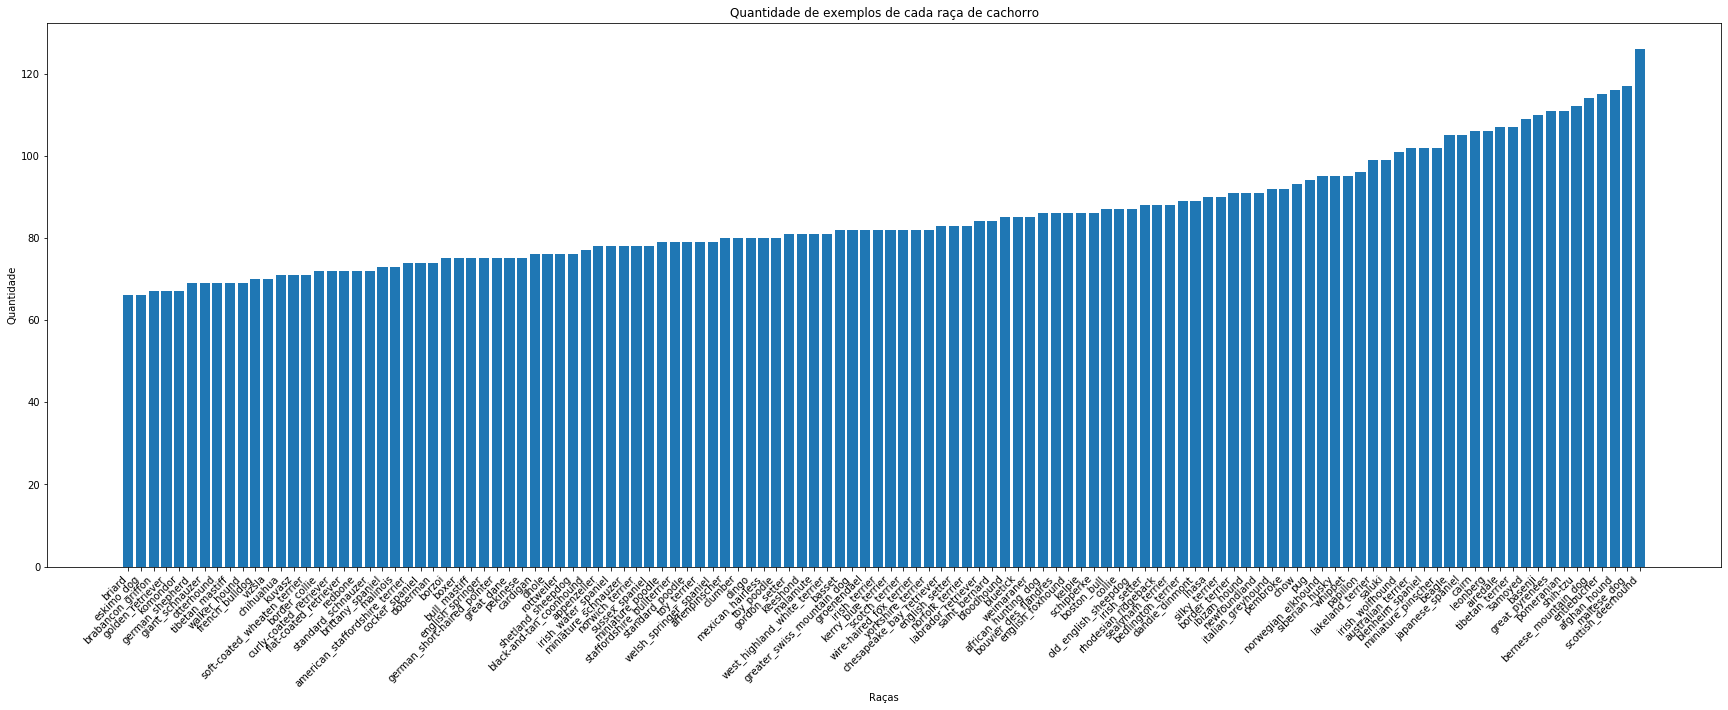

In [7]:
x = [ p[1] for p in counter_pairs ]
y = [ p[0] for p in counter_pairs ]

plot(x, y, size=(30, 10))

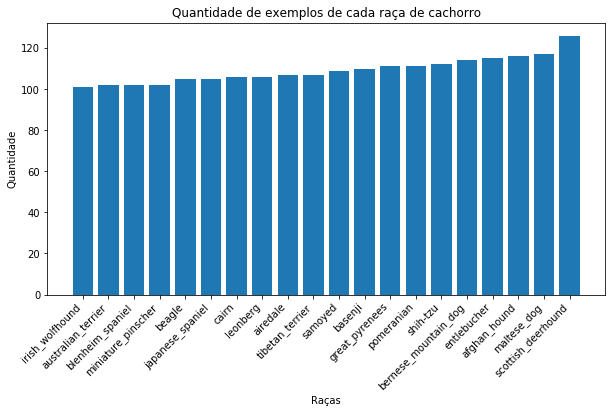

In [8]:
above_100_y = list(filter(lambda value: value >= 100, y))
above_100_x = x[120 - len(above_100_y):]

plot(above_100_x, above_100_y, size=(10, 5))

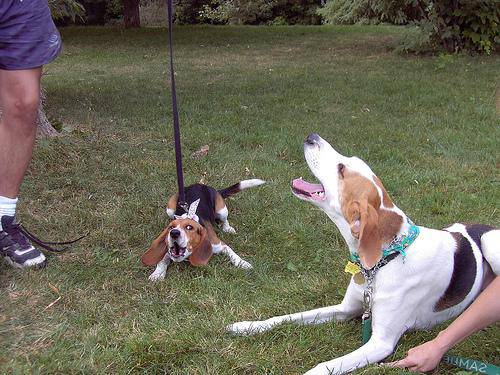

In [127]:
from IPython.display import Image
from random import randint

def dog_example(race):
    desired_race = data[breed == race]
    dog_id = desired_race.iloc[randint(0, len(desired_race) - 1)].id
    return Image(filename=f'../dogs_data/train/{dog_id}.jpg')

dog_example('beagle')